In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_57959/1207551879.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_57959/1207551879.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [4]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [5]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
dt = DecisionTreeClassifier(random_state=42, max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [8]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.66      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.80      0.80       179



In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.83      0.68      0.75        74

    accuracy                           0.81       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [11]:
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

In [12]:
print("Feature Importances:", importances)

Feature Importances:   Feature  Importance
1     Sex    0.500929
3    Fare    0.198722
0  Pclass    0.158160
2     Age    0.142189


/var/folders/zf/w3j1ml0515n95n1b6zbhzxw80000gn/T/ipykernel_57959/566303590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


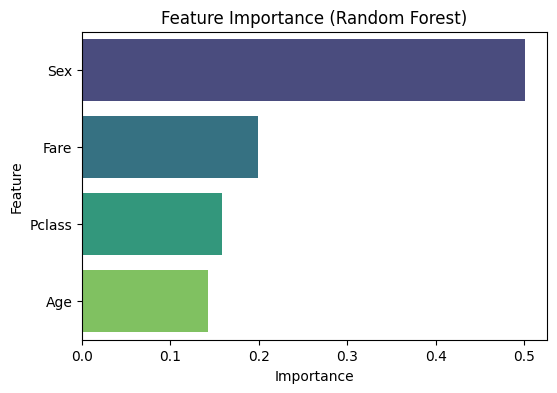

In [13]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.show()